In [33]:
import pandas as pd
import numpy as np
import mlflow
from mlflow.tracking import MlflowClient

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from itertools import product
import joblib

In [3]:
path = '/Users/binit/PycharmProjects/ML_AIT_A3/pythonProject/ProjectA3/Data/Out_287.csv'

In [4]:
df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0'])

In [26]:
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,BMW,2017,3200000,13663,Diesel,Dealer,Automatic,1,22.69,1995.0,190.00,5.0
1,BMW,2012,900000,155000,Diesel,Individual,Automatic,2,16.07,1995.0,181.00,4.0
2,BMW,2017,2950000,39000,Diesel,Dealer,Automatic,1,19.59,1995.0,187.74,5.0
3,BMW,2009,1100000,60000,Diesel,Individual,Automatic,2,16.07,1995.0,181.00,5.0
4,BMW,2012,1100000,80000,Diesel,Individual,Automatic,2,16.07,1995.0,181.00,5.0


In [5]:
df.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,6663.000000,6.663000e+03,6663.000000,6663.000000,6663.000000,6663.000000,6663.000000,6663.000000
mean,2013.588924,5.243708e+05,73044.716644,1.499475,19.508243,1433.287858,87.871039,5.442593
std,3.898769,5.090416e+05,48214.360087,0.733034,3.913635,492.908839,31.622824,0.988814
min,1994.000000,2.999900e+04,1000.000000,1.000000,9.000000,624.000000,34.200000,4.000000
25%,2011.000000,2.500000e+05,38000.000000,1.000000,16.800000,1197.000000,68.000000,5.000000
50%,2014.000000,4.200000e+05,69123.000000,1.000000,19.500000,1248.000000,81.860000,5.000000
75%,2017.000000,6.500000e+05,100000.000000,2.000000,22.540000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,500000.000000,4.000000,42.000000,3604.000000,400.000000,14.000000


In [6]:
columns_drop = ['seats','owner']
df.drop(columns=columns_drop, inplace=True)

In [7]:
selling_price = df['selling_price']  # Use your dataset
bins = [0, 250000, 500000, 750000, df['selling_price'].max()]  # Define bin edges
labels = [0, 1, 2, 3]  # Assign category labels

df['price_category_bins'] = pd.cut(df['selling_price'], bins=bins, labels=labels, include_lowest=True)
print(df['price_category_bins'].value_counts())

price_category_bins
1    2335
0    1719
2    1559
3    1050
Name: count, dtype: int64


In [56]:
dff = df.loc[:, df.columns.drop('selling_price')]

In [8]:
dff = df.copy()

In [9]:
dff.query("selling_price > 750000 and selling_price < 10000000").describe()

,year,selling_price,km_driven,mileage,engine,max_power
count,1049.000000,1.049000e+03,1049.000000,1049.000000,1049.000000,1049.000000
mean,2016.457579,1.287957e+06,56991.452812,18.200114,1877.421354,127.896273
std,2.223307,8.239498e+05,44162.316900,4.508758,529.265577,39.454969
min,2005.000000,7.510000e+05,1000.000000,9.000000,998.000000,62.100000
25%,2015.000000,8.500000e+05,25000.000000,15.100000,1493.000000,98.600000
50%,2017.000000,9.750000e+05,48000.000000,17.100000,1798.000000,120.000000
75%,2018.000000,1.350000e+06,77000.000000,22.000000,2179.000000,147.940000
max,2020.000000,7.200000e+06,426000.000000,28.400000,3604.000000,282.000000


In [10]:
dff[dff['price_category_bins']==3].describe()

,year,selling_price,km_driven,mileage,engine,max_power
count,1050.000000,1.050000e+03,1050.000000,1050.000000,1050.000000,1050.000000
mean,2016.458095,1.296254e+06,56965.746667,18.222781,1877.508571,128.155419
std,2.222310,8.663322e+05,44149.120843,4.566068,529.020795,40.320284
min,2005.000000,7.510000e+05,1000.000000,9.000000,998.000000,62.100000
25%,2015.000000,8.500000e+05,25000.000000,15.100000,1493.750000,98.600000
50%,2017.000000,9.750000e+05,48000.000000,17.100000,1877.000000,120.000000
75%,2018.000000,1.350000e+06,76784.750000,22.000000,2179.000000,147.985000
max,2020.000000,1.000000e+07,426000.000000,42.000000,3604.000000,400.000000


In [12]:
dff["km_driven"] = np.log1p(dff["km_driven"])  # 
dff["max_power"] = np.log1p(dff["max_power"])

In [11]:
# Compute the mean selling price for each brand
brand_mean_price = dff.groupby("brand")["selling_price"].mean().to_dict()

# Replace brand names with their average selling price
dff["brand_encoded"] = dff["brand"].map(brand_mean_price)

In [30]:
dff.head(3)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,price_category_bins,brand_encoded
0,BMW,2017,3200000,13663,Diesel,Dealer,Automatic,22.69,1995.0,190.00,3,2.826222e+06
1,BMW,2012,900000,155000,Diesel,Individual,Automatic,16.07,1995.0,181.00,3,2.826222e+06
2,BMW,2017,2950000,39000,Diesel,Dealer,Automatic,19.59,1995.0,187.74,3,2.826222e+06


In [34]:
dff['seller_type'].value_counts()

seller_type
Individual          5977
Dealer               659
Trustmark Dealer      27
Name: count, dtype: int64

In [27]:
df.head(2)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,price_category_bins
0,BMW,2017,3200000,13663,Diesel,Dealer,Automatic,22.69,1995.0,190.0,3
1,BMW,2012,900000,155000,Diesel,Individual,Automatic,16.07,1995.0,181.0,3


In [34]:
X_train, X_test, ytrain, ytest = train_test_split(
    dff.drop(columns=['price_category_bins','selling_price', 'brand', 'fuel','mileage']),
    dff['price_category_bins'],
    test_size=0.2,
    stratify=dff['price_category_bins'],  # Ensures equal class proportions
    random_state=42
)

columns_to_encode = ['seller_type','transmission']
scaler = MinMaxScaler()
oh = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('onehot', oh, columns_to_encode),  # One-hot encoding for categorical columns
    ('scaling', scaler, ['year', 'km_driven','engine','max_power',  'brand_encoded'])  # Scaling numerical columns
], remainder='passthrough')

X_train_trf = preprocessor.fit_transform(X_train)
X_test_trf = preprocessor.transform(X_test)


In [31]:
joblib.dump(brand_mean_price, 'brand_means.pkl')
print("brand_means.pkl has been saved.")

brand_means.pkl has been saved.


In [14]:
feature_names = ['seller_type_Individual', 'seller_type_Dealer','seller_type_Trustmark_Dealer','transmission_Automatic', 'transmission_Manual','year','km_driven','engine', 'max_power', 'brand_encoded']

In [26]:
X_train

,year,km_driven,seller_type,transmission,engine,max_power,brand_encoded
4506,2008,80000,Individual,Manual,1086.0,63.00,4.720181e+05
2325,2012,81632,Dealer,Manual,1399.0,68.00,5.081614e+05
2404,2015,130000,Individual,Automatic,2982.0,168.50,9.094595e+05
5353,2012,123000,Individual,Manual,1197.0,85.80,3.949493e+05
943,2015,62000,Dealer,Manual,1498.0,74.96,6.236416e+05
...,...,...,...,...,...,...,...
5746,2012,60000,Individual,Manual,1598.0,103.60,4.737470e+05
5090,2018,15000,Individual,Manual,1197.0,81.80,3.949493e+05
3947,2012,50000,Individual,Automatic,2143.0,170.00,2.242136e+06
1174,2016,70000,Individual,Manual,1248.0,88.50,3.949493e+05


In [35]:
X_train_trf[:5]

array([[0.        , 1.        , 0.        , 0.        , 1.        ,
        0.53846154, 0.15831663, 0.15503356, 0.07873155, 0.09977443],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        0.69230769, 0.16158717, 0.26006711, 0.09240022, 0.1089036 ],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
        0.80769231, 0.25851703, 0.79127517, 0.36714051, 0.21026424],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.69230769, 0.24448898, 0.19228188, 0.14106069, 0.08030826],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        0.80769231, 0.12224449, 0.29328859, 0.11142701, 0.1380718 ]])

In [28]:
dff[dff['brand']=='BMW']

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,price_category_bins,brand_encoded
0,BMW,2017,3200000,13663,Diesel,Dealer,Automatic,22.69,1995.0,190.00,3,2.826222e+06
1,BMW,2012,900000,155000,Diesel,Individual,Automatic,16.07,1995.0,181.00,3,2.826222e+06
2,BMW,2017,2950000,39000,Diesel,Dealer,Automatic,19.59,1995.0,187.74,3,2.826222e+06
3,BMW,2009,1100000,60000,Diesel,Individual,Automatic,16.07,1995.0,181.00,3,2.826222e+06
4,BMW,2012,1100000,80000,Diesel,Individual,Automatic,16.07,1995.0,181.00,3,2.826222e+06
5,BMW,2016,2150000,30000,Diesel,Dealer,Automatic,22.69,1995.0,190.00,3,2.826222e+06
6,BMW,2012,1300000,140000,Diesel,Individual,Automatic,18.88,1995.0,184.00,3,2.826222e+06
7,BMW,2010,1100000,102000,Diesel,Dealer,Automatic,19.62,1995.0,187.74,3,2.826222e+06
8,BMW,2017,2600000,44000,Diesel,Dealer,Automatic,22.69,1995.0,190.00,3,2.826222e+06
9,BMW,2013,1300000,140000,Diesel,Individual,Automatic,18.88,1995.0,184.00,3,2.826222e+06


In [40]:
# Save the trained model
joblib.dump(preprocessor, "preprocessor.pkl")
print("Preprocessor saved successfully!")

Preprocessor saved successfully!


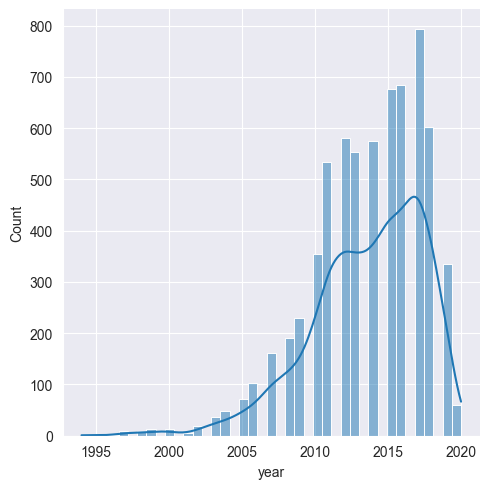

In [20]:
sns.displot(data=dff, x='year', kde=True)

<Axes: xlabel='selling_price'>

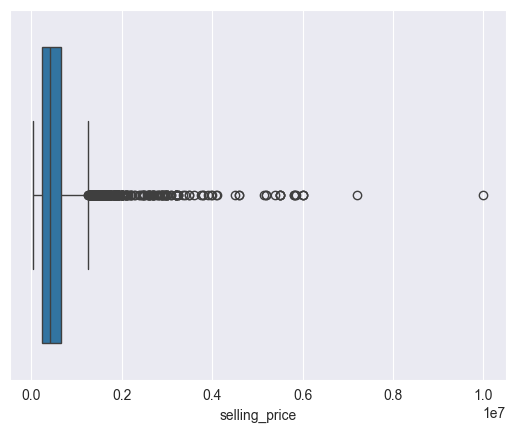

In [102]:
sns.boxplot(data=df, x='selling_price')

In [16]:
## Customs logistic regression 
class MyLogisticRegression:
    
    def __init__(self, cv:int=5, lr:float=0.1, 
                 max_iter:int=5000, weight_init:str='uniform', 
                 method:str='mini_batch', batch_size:int=64, l2:float=None,):
        self.lr = lr
        self.cv = cv
        self.max_iter = max_iter
        self.weight_init = weight_init
        self.method = method
        self.batch_size = batch_size
        self.l2 = 0 if l2 is None else l2
        
        valid_weight_init = ['uniform', 'normal', 'xavier','ones']
        
        if weight_init not in valid_weight_init:
            raise ValueError(f'weight_init must be one of {valid_weight_init}')
        
        valid_method = ['mini_batch', 'batch', 'stochastic']
        
        if method not in valid_method:
            raise ValueError(f'method must be one of {valid_method}')
        
    def fit(self, X, y):
        self.split = KFold(n_splits=self.cv)
        y_class = len(np.unique(y))

        if hasattr(X, "toarray"):
            X = X.toarray()  # Convert sparse matrix to dense

        # Ensure y is a NumPy array
        if not isinstance(y, np.ndarray):
            y = y.to_numpy() if hasattr(y, "to_numpy") else np.array(y)
        
        # One-Hot Encode y
        self.oh = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        y_encoded = self.oh.fit_transform(y.reshape(-1, 1))

        self.losses = []
        self.valid_losses = []
        self.train_accuracies = []
        self.valid_accuracies = []

        for fold, (train_index, test_index) in enumerate(self.split.split(X)):
            X_train, X_val = X[train_index], X[test_index]
            y_train, y_val = y_encoded[train_index], y_encoded[test_index]

            X_train = self._add_intercept(X_train)
            X_val = self._add_intercept(X_val)

            self.W = self.weight_initializer(X_train, y_class)
            self.velocity = np.zeros_like(self.W)

            fold_train_losses = []
            fold_train_accuracies = []

            if self.method == 'mini_batch':
                for i in range(self.max_iter):
                    ix = np.random.randint(0, X_train.shape[0])
                    X_train_batch = X_train[ix:ix + self.batch_size]
                    y_train_batch = y_train[ix:ix + self.batch_size]
                    loss = self.train(X_train_batch, y_train_batch)
                    fold_train_losses.append(loss)

                    _, train_pred = self.predict(X_train_batch)
                    train_accuracy = np.mean(np.argmax(y_train_batch, axis=1) == train_pred)
                    fold_train_accuracies.append(train_accuracy)

                    if i % 500 == 0:
                        print(f"Iteration {i} - Loss: {loss:.4f}, Accuracy: {train_accuracy:.4f}")

            elif self.method == 'batch':
                for i in range(self.max_iter):
                    loss = self.train(X_train, y_train)
                    fold_train_losses.append(loss)

                    _, train_pred = self.predict(X_train)
                    train_accuracy = np.mean(np.argmax(y_train, axis=1) == train_pred)
                    fold_train_accuracies.append(train_accuracy)

                    if i % 500 == 0:
                        print(f"Iteration {i} - Loss: {loss:.4f}, Accuracy: {train_accuracy:.4f}")

            elif self.method == 'stochastic':
                for i in range(self.max_iter):
                    idx = np.random.randint(X_train.shape[0])  # Select a random index
                    X_sto = X_train[idx, :].reshape(1, -1)  # Get the single sample
                    y_sto = y_train[idx].reshape(1, -1)  # Get the corresponding label
                    
                    loss = self.train(X_sto, y_sto)  # Train the model on this single example
                    
                    if not np.isnan(loss):  # Ensure the loss is valid
                        fold_train_losses.append(loss)
                    
                    _, train_pred = self.predict(X_sto)  # Get predicted class
                    train_accuracy = np.mean(np.argmax(y_sto, axis=1) == train_pred)
                    fold_train_accuracies.append(train_accuracy)
        
                    if i % 500 == 0:
                        print(f"Iteration {i} - Loss: {loss:.4f}, Accuracy: {train_accuracy:.4f}")
                    
            # Store the average training loss & accuracy for this fold
            avg_train_loss = np.mean(fold_train_losses)
            avg_train_accuracy = np.mean(fold_train_accuracies)
            self.losses.append(avg_train_loss)
            self.train_accuracies.append(avg_train_accuracy)

            val_pred = self.predict(X_val)[1]  # Get predicted class labels
            y_val_labels = self.oh.inverse_transform(y_val)

            # Compute validation loss
            val_loss = self.cross_entropy(self.softmax_(X_val @ self.W), y_val)
            self.valid_losses.append(val_loss)

            # Compute validation accuracy
            val_accuracy = np.mean(y_val_labels.flatten() == val_pred)
            self.valid_accuracies.append(val_accuracy)

            print(f"Fold: {fold}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_accuracy:.4f}, "
                  f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
                
    def train(self, X, y):
        y_hat, _  = self.predict(X)

        error = y_hat - y
        m = max(X.shape[0], 1)  # Ensure division is valid

        loss = self.cross_entropy(y_hat, y) if m > 1 else float(np.mean(y_hat))
        
        grad = X.T @ error  +  2 * self.l2 * self.W 
        self.velocity = 0.8 * self.velocity - self.lr * grad
        self.W += self.velocity
        #self.W -= self.lr * grad
        
        return loss if not np.isnan(loss) else 0.0 
                
    def predict(self, X, is_test=False):
        if is_test:
            X = self._add_intercept(X)
    
        y_hat = X @ self.W
        y_hat = self.softmax_(y_hat)
        y_real = np.argmax(y_hat, axis=1)
        return y_hat, y_real
    
    def softmax_(self, X):
        X_max = np.max(X, axis=1, keepdims=True)  # Find max per row
        exp_shifted = np.exp(X - X_max)  # Shift values for numerical stability
        return exp_shifted / np.sum(exp_shifted, axis=1, keepdims=True)  # Normalize
    
    def weight_initializer(self, X, num_classes):
        if self.weight_init == 'uniform':
            return np.random.uniform(low=-self.lr, high=self.lr, size=(X.shape[1], num_classes))
        elif self.weight_init == 'normal':
            return np.random.randn(X.shape[1], num_classes)
        elif self.weight_init == 'xavier':
            limit = np.sqrt(6 / (X.shape[1] + num_classes))
            return np.random.uniform(low=-limit, high=limit, size=(X.shape[1], num_classes))
        else:
            return np.ones((X.shape[1], num_classes))
        
    def cross_entropy(self, y, y_hat):
        if y_hat.size == 0 or y.size == 0:
            return 0.0  # Return zero loss to avoid NaN issues
    
        m = max(y.shape[0], 1)  # Prevent division by zero
        loss = - np.sum(y * np.log(y_hat + 1e-9))/m ## Prevent log(0)
        return  loss + self.l2*np.sum(self.W**2)
    
    def _add_intercept(self,X):
        return np.c_[np.ones(X.shape[0]), X]
    
    def classification_report(self, pred, y):
        # Ensure both pred and y are NumPy arrays
        pred = np.array(pred).flatten()
        y = np.array(y)
        
        if len(pred) == 0 or len(y) == 0:  # Prevent empty array issues
            return 0.0  # Return zero accuracy to avoid NaN
    
        # Extract unique labels from both predictions and ground truth
        labels = np.unique(np.concatenate((y, pred)))
        num_classes = len(labels)  # Update num_classes based on unique labels
    
        # Initialize confusion matrix
        cm = np.zeros((num_classes, num_classes), dtype=int)
        
        for true, pred_label in zip(y, pred):
            # Get index positions of true and predicted labels in `labels`
            true_idx = np.where(labels == true)[0]
            pred_idx = np.where(labels == pred_label)[0]
    
            if true_idx.size > 0 and pred_idx.size > 0:  # Check if valid indices exist
                cm[true_idx[0], pred_idx[0]] += 1
    
        # Compute metrics
        tp = np.diag(cm)
        fp = np.sum(cm, axis=0) - tp
        fn = np.sum(cm, axis=1) - tp
    
        precision = np.divide(tp, tp + fp, out=np.zeros_like(tp, dtype=float), where=(tp + fp) > 0)
        recall = np.divide(tp, tp + fn, out=np.zeros_like(tp, dtype=float), where=(tp + fn) > 0)
        f1_score = np.divide(2 * precision * recall, precision + recall, out=np.zeros_like(precision, dtype=float), where=(precision + recall) > 0)
        
        accuracy_score = np.sum(np.diag(cm)) / np.sum(cm) if np.sum(cm) > 0 else 0.0
        
        # Weighted metrics
        class_counts = np.array([(y == label).sum() for label in labels]) / len(y)
        weighted_precision = np.sum(class_counts * precision)
        weighted_recall = np.sum(class_counts * recall)
        weighted_f1 = np.sum(class_counts * f1_score)
    
        # Print report
        print("\nClassification Report:\n")
        print("{:<10} {:<10} {:<10} {:<10}".format("Class", "Precision", "Recall", "F1-score"))
        print("-" * 40)
        for i, label in enumerate(labels):
            print(f"{label:<10} {precision[i]:<10.2f} {recall[i]:<10.2f} {f1_score[i]:<10.2f}")
    
        return round(accuracy_score, 2), round(weighted_precision, 2), round(weighted_recall, 2), round(weighted_f1, 2)
    
    
    def _coeff_and_biases(self, feature_names):
        if not hasattr(self, "W"):
            raise ValueError("Model is not trained yet. Fit the model before retrieving coefficients.")
        
        coef = self.W[1:,:]  # Exclude bias term
        bias = self.W[0, :]
        print(coef.shape, len(feature_names))
        # Create a DataFrame for easy interpretation
        coef_df = pd.DataFrame(coef, index=feature_names, columns=[f"Class_{i}" for i in range(coef.shape[1])] if coef.ndim > 1 else ["Coefficient"])
        
        print("\nTop Important Features:")
        print(coef_df.abs().sum(axis=1).sort_values(ascending=False).head(10))

        return coef_df, bias

In [11]:
def softmax_(self, X):
        return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)

<Axes: >

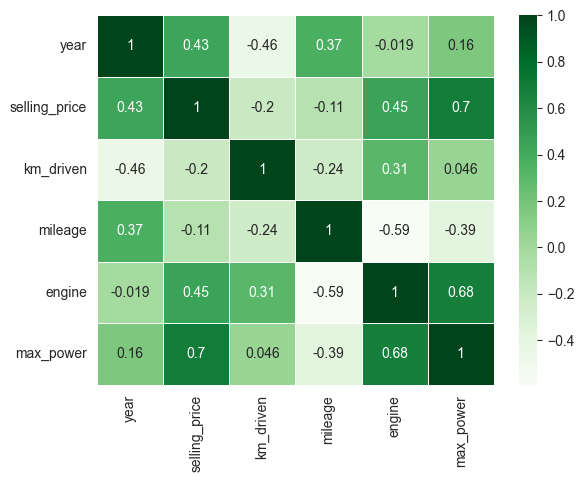

In [118]:
## remove engine, owners, seats
num_col = df.select_dtypes(include=['float','int64']).columns.tolist()
sns.heatmap(df[num_col].corr(), cmap='Greens', annot=True, linewidths=0.5)

In [81]:
df['selling_price'].describe()

count    6.663000e+03
mean     5.243708e+05
std      5.090416e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.200000e+05
75%      6.500000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

<Axes: xlabel='selling_price', ylabel='Count'>

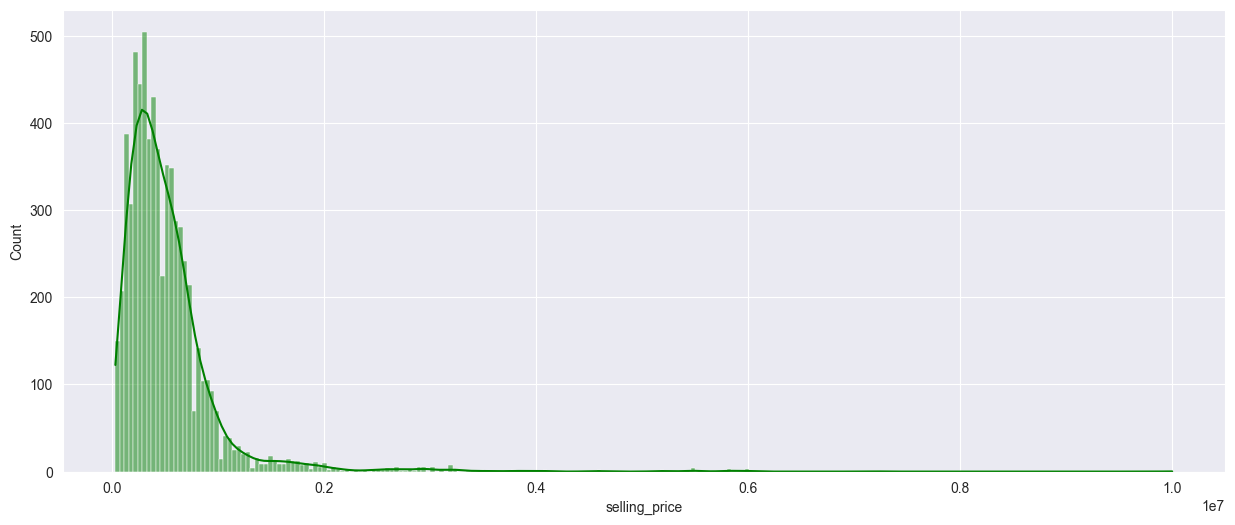

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='selling_price', kde=True, color='green')

In [58]:
a = np.random.randint(low=1, high=100, size=(10,4))
print(a.shape, a.flatten().shape)

(10, 4) (40,)


In [39]:
model = MyLogisticRegression(weight_init='uniform', lr=0.001, batch_size=64, max_iter=7500, method='mini_batch', l2=0.01)
model.fit(X_train_trf, ytrain)

Iteration 0 - Loss: 15.5435, Accuracy: 0.3125
Iteration 500 - Loss: 13.4214, Accuracy: 0.4844
Iteration 1000 - Loss: 13.3199, Accuracy: 0.5156
Iteration 1500 - Loss: 12.7763, Accuracy: 0.6250
Iteration 2000 - Loss: 13.3444, Accuracy: 0.6875
Iteration 2500 - Loss: 13.7307, Accuracy: 0.5781
Iteration 3000 - Loss: 14.4218, Accuracy: 0.5625
Iteration 3500 - Loss: 14.7671, Accuracy: 0.6250
Iteration 4000 - Loss: 14.1614, Accuracy: 0.6406
Iteration 4500 - Loss: 13.9069, Accuracy: 0.7031
Iteration 5000 - Loss: 14.2293, Accuracy: 0.6719
Iteration 5500 - Loss: 14.3805, Accuracy: 0.6250
Iteration 6000 - Loss: 14.6237, Accuracy: 0.6562
Iteration 6500 - Loss: 15.0926, Accuracy: 0.6719
Iteration 7000 - Loss: 14.0260, Accuracy: 0.7188
Fold: 0, Train Loss: 14.0470, Train Accuracy: 0.6298, Val Loss: 14.8722, Val Accuracy: 0.6867
Iteration 0 - Loss: 15.5423, Accuracy: 0.3281
Iteration 500 - Loss: 12.5881, Accuracy: 0.7344
Iteration 1000 - Loss: 13.4430, Accuracy: 0.5938
Iteration 1500 - Loss: 12.8380, 

In [41]:
_ , pred = model.predict(X_test_trf, is_test=True)
print(model.classification_report(pred, ytest))
print(len(pred))


Classification Report:

Class      Precision  Recall     F1-score  
----------------------------------------
0          0.84       0.74       0.79      
1          0.54       0.83       0.66      
2          0.46       0.24       0.31      
3          0.75       0.57       0.64      
(np.float64(0.63), np.float64(0.63), np.float64(0.63), np.float64(0.61))
1333


In [42]:
_, w = model._coeff_and_biases(feature_names)
print(w)

(10, 4) 10

Top Important Features:
year                            25.176805
max_power                       14.248193
engine                          12.260812
transmission_Manual              7.494497
seller_type_Dealer               6.473414
brand_encoded                    5.632021
km_driven                        4.798056
transmission_Automatic           4.756510
seller_type_Individual           4.426512
seller_type_Trustmark_Dealer     1.469455
dtype: float64
[ 4.71619872  1.40862785 -2.10999629 -4.01531078]


In [43]:
joblib.dump(model, "model.pkl")
print("Preprocessor saved successfully!")

Preprocessor saved successfully!


In [25]:
usr_data = {'brand',}

[1 1 3 1 1 1 3 2 3 2 3 1 2 1 0 1 2 2 1 1]


In [138]:
mlflow.set_experiment("MLflow_Classification_Registry")

# Lists of hyperparameters
methods = ["batch", "mini_batch", "stochastic"]  
weights = ["xavier", "normal", "uniform"]
penalty = [None, 0.01]
lr = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]  # Added batch sizes

# Initialize best model tracking
best_model_acc, best_acc, best_params_acc = None, float('-inf'), None
best_run_id = None

def run_experiment(method, weight, lr, penalty, batch_size):
    """Runs ML experiments, logs results in MLflow, and tracks the best models."""
    global best_model_acc, best_acc, best_params_acc, best_run_id

    params = {
        "method": method, "lr": lr, "weight_init": weight, "l2": penalty, "batch_size": batch_size
    }

    print(f"Running MyLogisticRegression | {method} | {weight} | LR: {lr} | l2: {penalty} | Batch Size: {batch_size}")

    # Initialize model with current hyperparameters
    model = MyLogisticRegression(
        lr=lr, 
        max_iter=7000, 
        weight_init=weight, 
        method=method,
        batch_size=batch_size, 
        l2=penalty
    )

    with mlflow.start_run(run_name=f"method-{method}-lr-{lr}-weight-{weight}-batch-{batch_size}", nested=True):

        # Train the model
        model.fit(X_train_trf, ytrain)

        # Predictions
        _, y_pred = model.predict(X_test_trf, is_test=True)

        # Compute metrics
        acc, precision, recall, f1_score = model.classification_report(y_pred, ytest)

        # Log hyperparameters & metrics in MLflow
        mlflow.log_params(params)
        mlflow.log_metrics({"accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1_score})

        # Save Model Signature
        signature = mlflow.models.infer_signature(X_train_trf, model.predict(X_train_trf, is_test=True)[1])
        mlflow.sklearn.log_model(model, artifact_path="model", signature=signature)

        print(f" Model: MyLogisticRegression | Method: {method} | Accuracy: {acc:.4f} | F1-Score: {f1_score:.4f}")

        # Track the Best Model Based on Accuracy (HIGHER IS BETTER)
        if acc > best_acc:
            best_acc = acc
            best_model_acc = model
            best_params_acc = params
            best_run_id = mlflow.active_run().info.run_id  # Save the best run ID for registry


# Iterate over all hyperparameter combinations
combinations_ = product(methods, weights, lr, batch_sizes)

# Run all experiments
for method, weight, lr, batch_size in combinations_:
    run_experiment(method, weight, lr, None, batch_size)

# Final Results: Best Model Based on Accuracy
print(f"Best Model by Accuracy: {best_model_acc} with Accuracy: {best_acc:.4f}")

mlflow.end_run()

# -----------------------
# Register Best Model in MLflow Model Registry
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Make sure MLflow server is running

if best_run_id:
    model_uri = f"runs:/{best_run_id}/model"
    model_name = "st124783-a3-model"  # Replace with your student ID

    # Register the best model
    model_version = mlflow.register_model(model_uri, model_name)
    print(f"\n Registered Model: {model_name} (Version: {model_version})")

    # Move the Model to 'Staging'
    client = MlflowClient()
    latest_version = client.get_latest_versions(model_name, stages=["None"])[0].version

    client.transition_model_version_stage(name=model_name, version=latest_version, stage="Staging")
    print(f"Model Version {latest_version} is now in 'Staging'!")

2025/03/17 23:08:03 INFO mlflow.tracking.fluent: Experiment with name 'MLflow_Classification_Registry' does not exist. Creating a new experiment.


Running MyLogisticRegression | batch | xavier | LR: 0.01 | l2: None | Batch Size: 32
Iteration 0 - Loss: 15.4983, Accuracy: 0.4641
Iteration 500 - Loss: 8.3558, Accuracy: 0.6794
Iteration 1000 - Loss: 6.3595, Accuracy: 0.6789
Iteration 1500 - Loss: 7.3733, Accuracy: 0.6100
Iteration 2000 - Loss: 8.0450, Accuracy: 0.5424
Iteration 2500 - Loss: 10.0565, Accuracy: 0.5227
Iteration 3000 - Loss: 8.5419, Accuracy: 0.6677
Iteration 3500 - Loss: 6.9325, Accuracy: 0.6041
Iteration 4000 - Loss: 9.0302, Accuracy: 0.5910
Iteration 4500 - Loss: 7.6723, Accuracy: 0.6393
Iteration 5000 - Loss: 8.2311, Accuracy: 0.6606
Iteration 5500 - Loss: 7.4938, Accuracy: 0.6651
Iteration 6000 - Loss: 9.5955, Accuracy: 0.6489
Iteration 6500 - Loss: 7.0547, Accuracy: 0.6360
Fold: 0, Train Loss: 8.1863, Train Accuracy: 0.6055, Val Loss: 7.1282, Val Accuracy: 0.6595
Iteration 0 - Loss: 16.5833, Accuracy: 0.4308
Iteration 500 - Loss: 7.4965, Accuracy: 0.6520
Iteration 1000 - Loss: 9.0381, Accuracy: 0.5471
Iteration 15

Successfully registered model 'st124783-a3-model'.
2025/03/17 23:19:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st124783-a3-model, version 1


 Model: MyLogisticRegression | Method: stochastic | Accuracy: 0.5700 | F1-Score: 0.5400
🏃 View run method-stochastic-lr-0.0001-weight-uniform-batch-128 at: http://127.0.0.1:5000/#/experiments/1/runs/9143f88ef54f4ddcae05b4dc3833cf9f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
Best Model by Accuracy: <__main__.MyLogisticRegression object at 0x16595b470> with Accuracy: 0.7000

 Registered Model: st124783-a3-model (Version: <ModelVersion: aliases=[], creation_timestamp=1742228386680, current_stage='None', description='', last_updated_timestamp=1742228386680, name='st124783-a3-model', run_id='1d7dc3517be246b1ba404c4fa7ae335e', run_link='', source='/Users/binit/PycharmProjects/ML_AIT_A3/mlruns/1/1d7dc3517be246b1ba404c4fa7ae335e/artifacts/model', status='READY', status_message=None, tags={}, user_id='', version='1'>)
Model Version 1 is now in 'Staging'!


Created version '1' of model 'st124783-a3-model'.
/var/folders/8j/ndxdwkv11mg2yfgyrfgqxrwr0000gn/T/ipykernel_15615/3042286121.py:89: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest_version = client.get_latest_versions(model_name, stages=["None"])[0].version
/var/folders/8j/ndxdwkv11mg2yfgyrfgqxrwr0000gn/T/ipykernel_15615/3042286121.py:91: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_mod

In [139]:
## Best Model 
print(best_acc, best_model_acc, best_params_acc)

0.7 <__main__.MyLogisticRegression object at 0x16595b470> {'method': 'batch', 'lr': 0.001, 'weight_init': 'xavier', 'l2': None, 'batch_size': 64}
